# Data Workflow Lab 1

Clean and summarize Project 3 data.

### Learning Objectives

* Practice text cleaning techniques
* Practice datatype conversion
* Practice filling in missing values with either 0 or the average in the column
* Practice categorical data techniques
* Transform data into usable quantities


In [1]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("../../../projects/project-03/starter-code/Iowa_Liquor_sales_sample_10pct.csv")
print df.columns
df.head()

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


## Clean the data

Let's practice our data cleaning skills on the Project 3 dataset. If you don't remember how to do any of these tasks, look back at your work from the previous weeks or search the internet. There are many blog articles and Stack Overflow posts that cover these topics.

You'll want to complete at least the following tasks:
* Remove redundant columns
* Remove "$" prices from characters and convert values to floats.
* Convert dates to pandas datetime objects
* Convert category floats to integers
* Drop or fill in bad values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [4]:
# Remove redundant columns
del df["Category Name"]
del df["Item Description"]
del df["County"]


In [5]:
# Remove $ from certain columns
# Remove $ from certain columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]

for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [6]:
mystring = "$500"
mystring[1:]

'500'

In [7]:
# Convert dates
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [8]:
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,1051100.0,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,1011100.0,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,1011200.0,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,1071100.0,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,1031080.0,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [9]:
# Drop or replace bad values
df = df.dropna()


# Convert integers
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


## Filter the Data

Some stores may have opened or closed in 2015. These data points will heavily skew our models, so we need to filter them out or find a way to deal with them.

You'll need to provide a summary in your project report about these data points. You may also consider using the monthly sales in your model and including other information (number of months or days each store is open) in your data to handle these unusual cases.

Let's record the first and last sales dates for each store. We'll save this information for later when we fit our models.

In [10]:
dates = df.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates

,Store Number,Date amin,Date amax
0,2106,2015-01-08,2016-03-31
1,2113,2015-01-07,2016-03-23
2,2130,2015-01-08,2016-03-31
3,2152,2015-01-08,2016-02-25
4,2178,2015-01-07,2016-03-30
5,2190,2015-01-05,2016-03-31
6,2191,2015-01-05,2016-03-28
7,2200,2015-01-07,2016-03-30
8,2205,2015-01-06,2015-12-28
9,2228,2015-01-06,2016-03-29


In [11]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]

# Filter out stores that opened or closed throughout the year
lower_cutoff = pd.Timestamp("20150301")
upper_cutoff = pd.Timestamp("20151001")

mask = (dates["Date amin"] < lower_cutoff) & (dates["Date amax"] > upper_cutoff)

good_stores = dates[mask]["Store Number"]


# You may want to save this step until you start modelling
df = df[df["Store Number"].isin(good_stores)]

In [12]:
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


## Compute New Columns and Tables

Since we're trying to predict sales and/or profits, we'll want to compute some intermediate data. There are a lot of ways to do thisand good use of pandas is crucial. For example, for each transaction we may want to know:
* margin, retail cost minus bottle cost
* price per bottle
* price per liter

We'll need to make a new dataframe that indexes quantities by store:
* sales per store for all of 2015
* sales per store for Q1 2015
* sales per store for Q1 2016
* total volumes sold
* mean transaction revenue, gross margin, price per bottle, price per liter, etc.
* average sales per day
* number of days open

Make sure to retain other variables that we'll want to use to build our models, such as zip code, county number, city, etc. We recommend that you spend some time thinking about the model you may want to fit and computing enough of the suggested quantities to give you a few options.

Bonus tasks:
* Restrict your attention to stores that were open for all of 2015 and Q1 2016. Stores that opened or closed in 2015 will introduce outliers into your data.
* For each transaction we have the item category. You may be able to determine the store type (primarily wine, liquor, all types of alcohol, etc.) by the most common transaction category for each store. This could be a useful categorical variable for modelling. 

In [13]:
# Margin and Price per liter
df["Margin"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]

df["Price per Liter"] = df["Sale (Dollars)"] / df["Volume Sold (Liters)"]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38,27.00,9.000000
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40,13.76,27.506667
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34,151.20,18.890000
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77,28.50,8.142857
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55,43.20,6.171429


In [14]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
count,256696.000000,256696.000000,2.566960e+05,256696.000000,256696.000000,256696.000000,256696.000000,256696.000000,256696.000000,256696.000000,256696.000000,256696.000000,256696.000000,256696.000000
mean,3524.837200,57.059756,1.043948e+06,256.463396,46132.429824,928.153263,9.808054,14.728065,9.888054,130.027677,9.062974,2.394389,43.473045,18.016549
std,914.872983,27.457945,5.011043e+04,141.344857,53701.179646,490.878953,7.077776,10.616076,24.331334,388.476047,29.175983,7.707470,130.414818,13.346452
min,2106.000000,1.000000,1.011100e+06,10.000000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000,0.000000,2.760000
25%,2600.000000,31.000000,1.012200e+06,115.000000,26827.000000,750.000000,5.540000,8.310000,2.000000,30.420000,1.500000,0.400000,10.150000,9.645714
50%,3664.000000,61.000000,1.031200e+06,260.000000,38176.000000,750.000000,8.200000,12.300000,6.000000,70.560000,5.250000,1.390000,23.520000,14.860000
75%,4296.000000,77.000000,1.062310e+06,380.000000,64676.000000,1000.000000,11.960000,17.940000,12.000000,136.560000,10.500000,2.770000,45.600000,22.490000
max,9010.000000,99.000000,1.701100e+06,978.000000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000,12130.800000,850.000000


In [15]:
df[df["Store Number"] == 3717]

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.00,2.38,27.00,9.000000
15,2015-06-10,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,4,27.00,3.00,0.79,9.00,9.000000
3292,2015-01-21,3717,SUMNER,50674,9,1081900,322,75211,750,10.00,15.00,2,30.00,1.50,0.40,10.00,20.000000
3399,2015-11-11,3717,SUMNER,50674,9,1012100,115,11777,1000,6.63,9.95,2,19.90,2.00,0.53,6.64,9.950000
3691,2015-01-07,3717,SUMNER,50674,9,1011200,65,19476,750,16.79,25.19,1,25.19,0.75,0.20,8.40,33.586667
3778,2015-02-18,3717,SUMNER,50674,9,1012300,370,15621,600,11.88,17.82,1,17.82,0.60,0.16,5.94,29.700000
3804,2016-03-23,3717,SUMNER,50674,9,1011100,260,25607,1000,8.00,12.00,2,24.00,2.00,0.53,8.00,12.000000
4073,2015-08-19,3717,SUMNER,50674,9,1062300,65,44520,750,6.83,10.25,1,10.25,0.75,0.20,3.42,13.666667
5611,2015-12-09,3717,SUMNER,50674,9,1012100,260,11296,750,15.00,22.50,2,45.00,1.50,0.40,15.00,30.000000
6700,2016-02-10,3717,SUMNER,50674,9,1081030,370,67527,1000,15.49,23.24,1,23.24,1.00,0.26,7.75,23.240000


In [16]:
# Sales per store, 2015

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns

# Quick check
sales.head()

,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean
0,2106,CEDAR FALLS,146326.22,277.658861,7,17.856601,50613,9731.85,18.466509,92.671879
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932
2,2130,WATERLOO,111871.43,285.386301,7,16.835809,50703,6891.37,17.580026,95.217347
3,2152,ROCKWELL,7721.08,54.759433,17,13.020765,50469,633.37,4.491986,18.351277
4,2178,WAUKON,24324.18,102.633671,3,16.053844,52172,1917.12,8.089114,34.454430


In [17]:
sales.shape

(1161, 10)

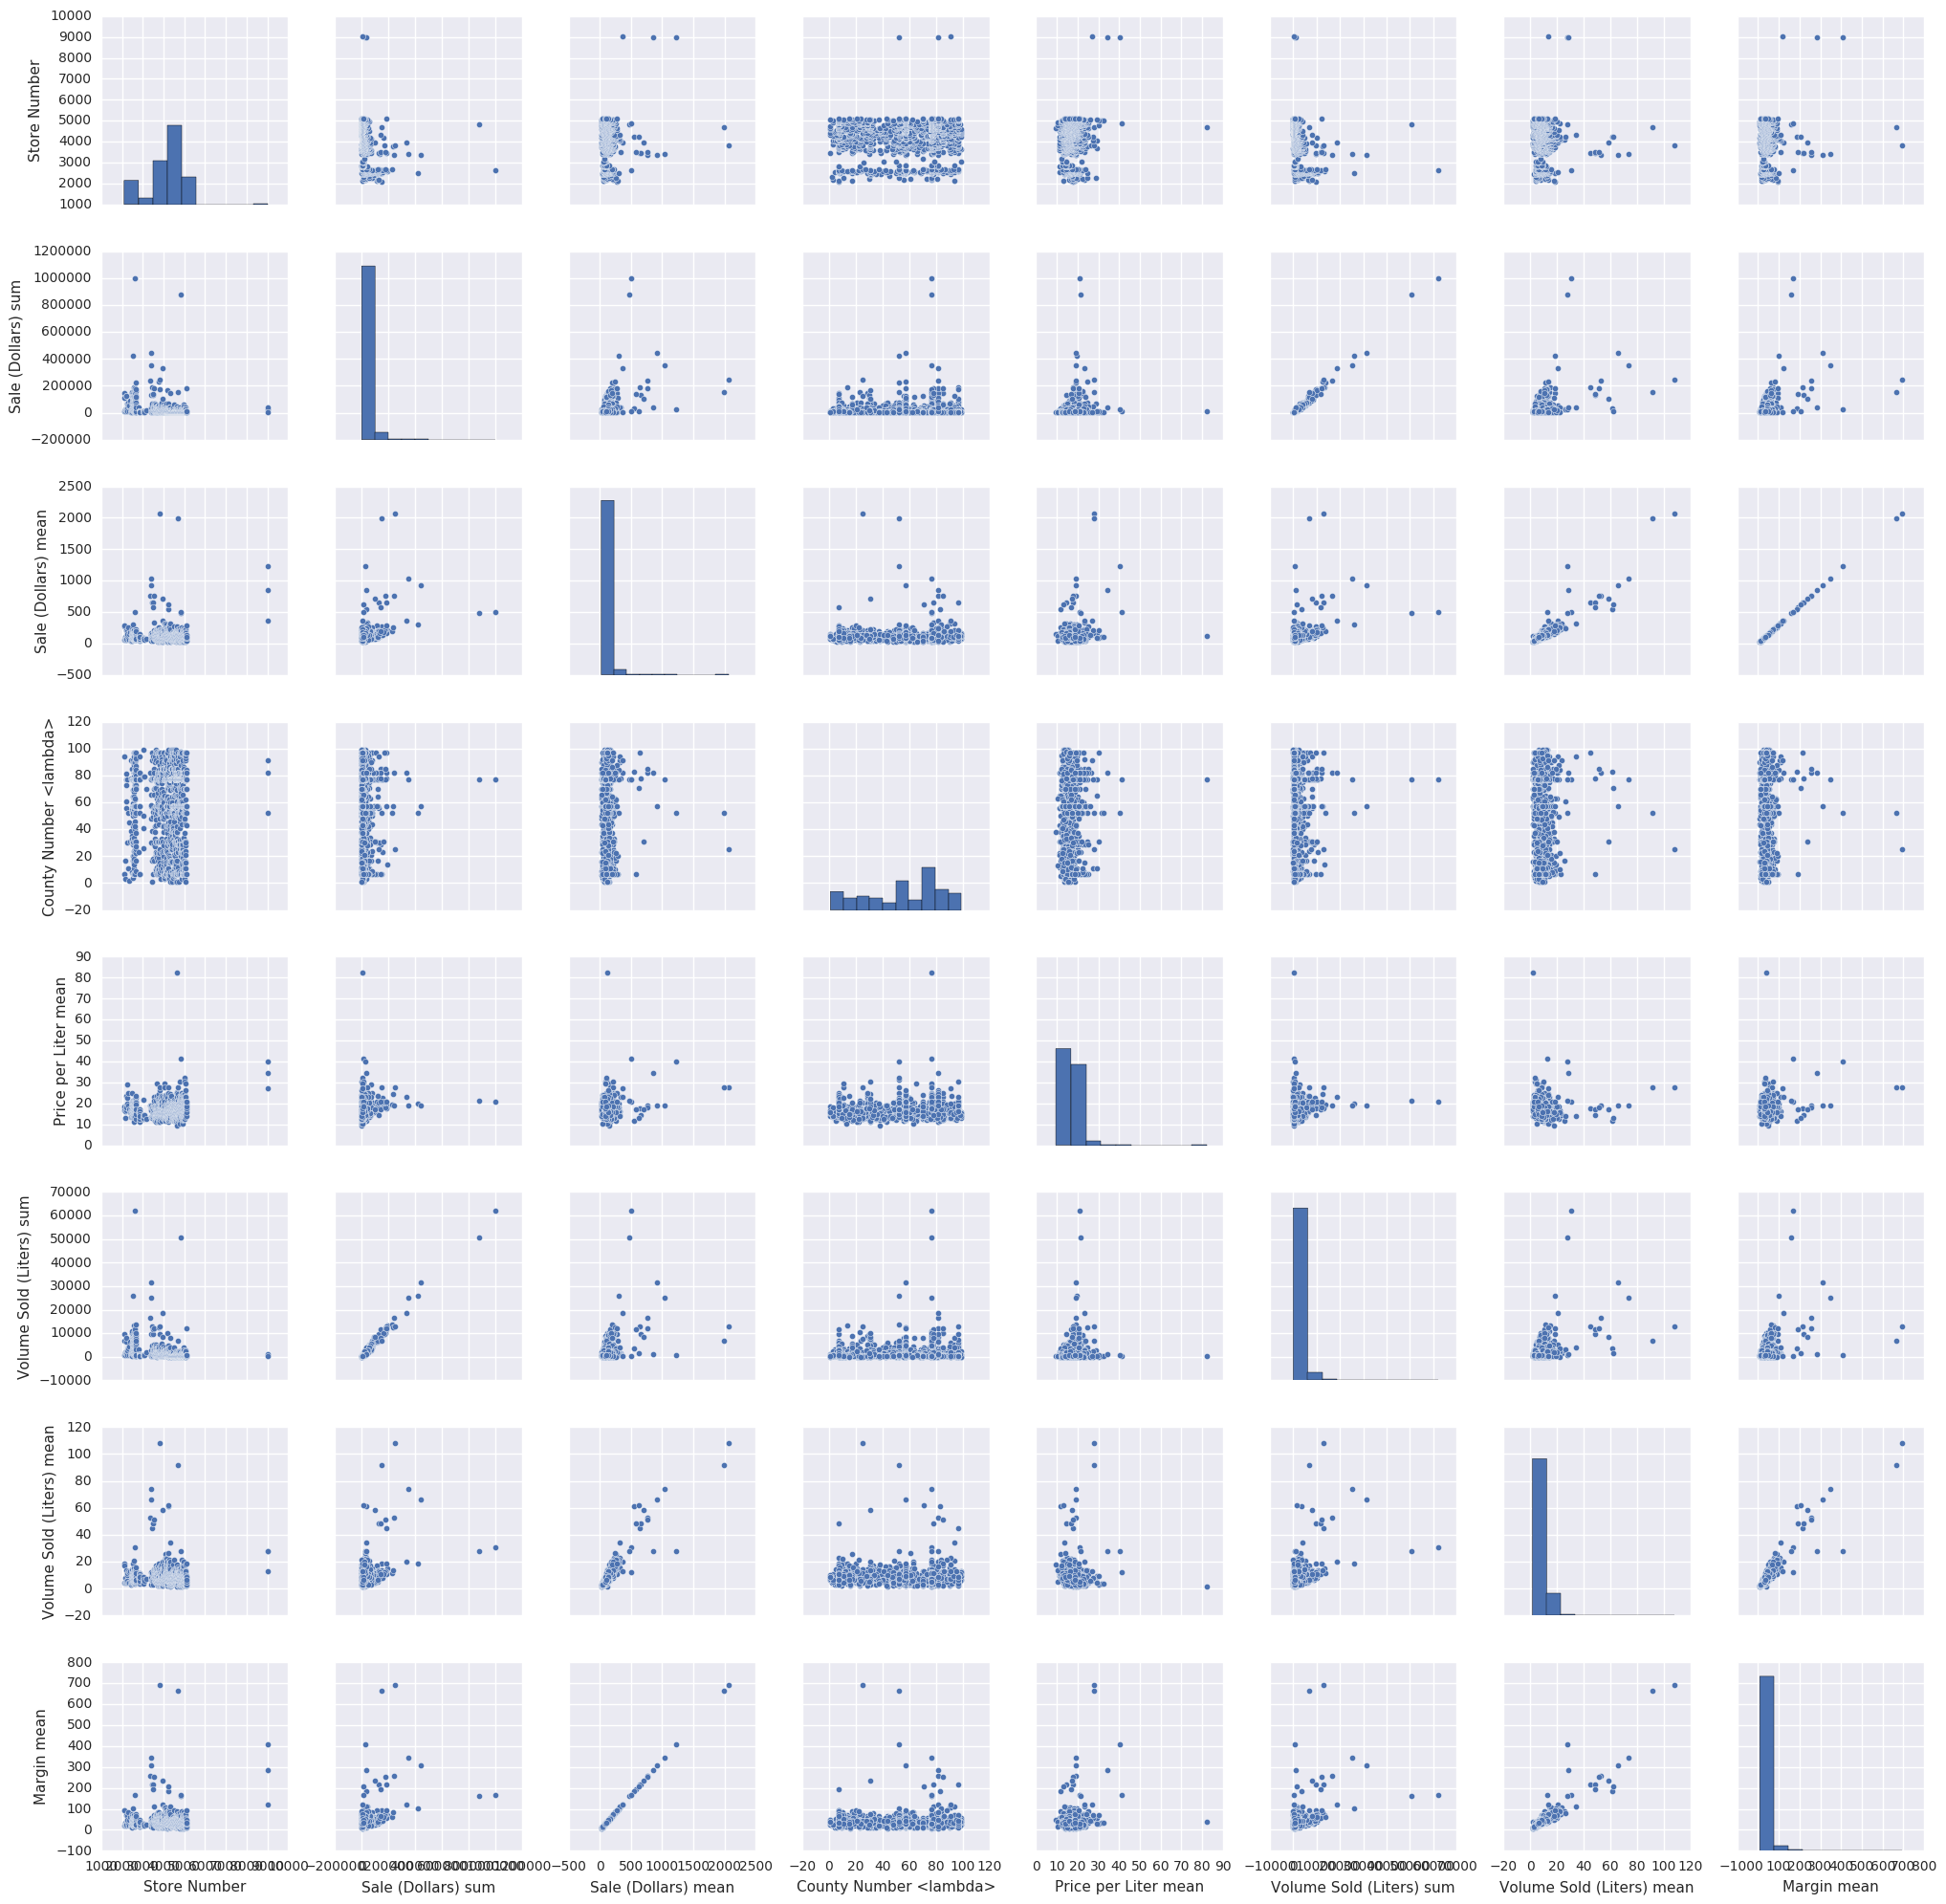

In [18]:
sns.pairplot(sales)

In [20]:
sales = sales[sales["Sale (Dollars) sum"] < 500000]

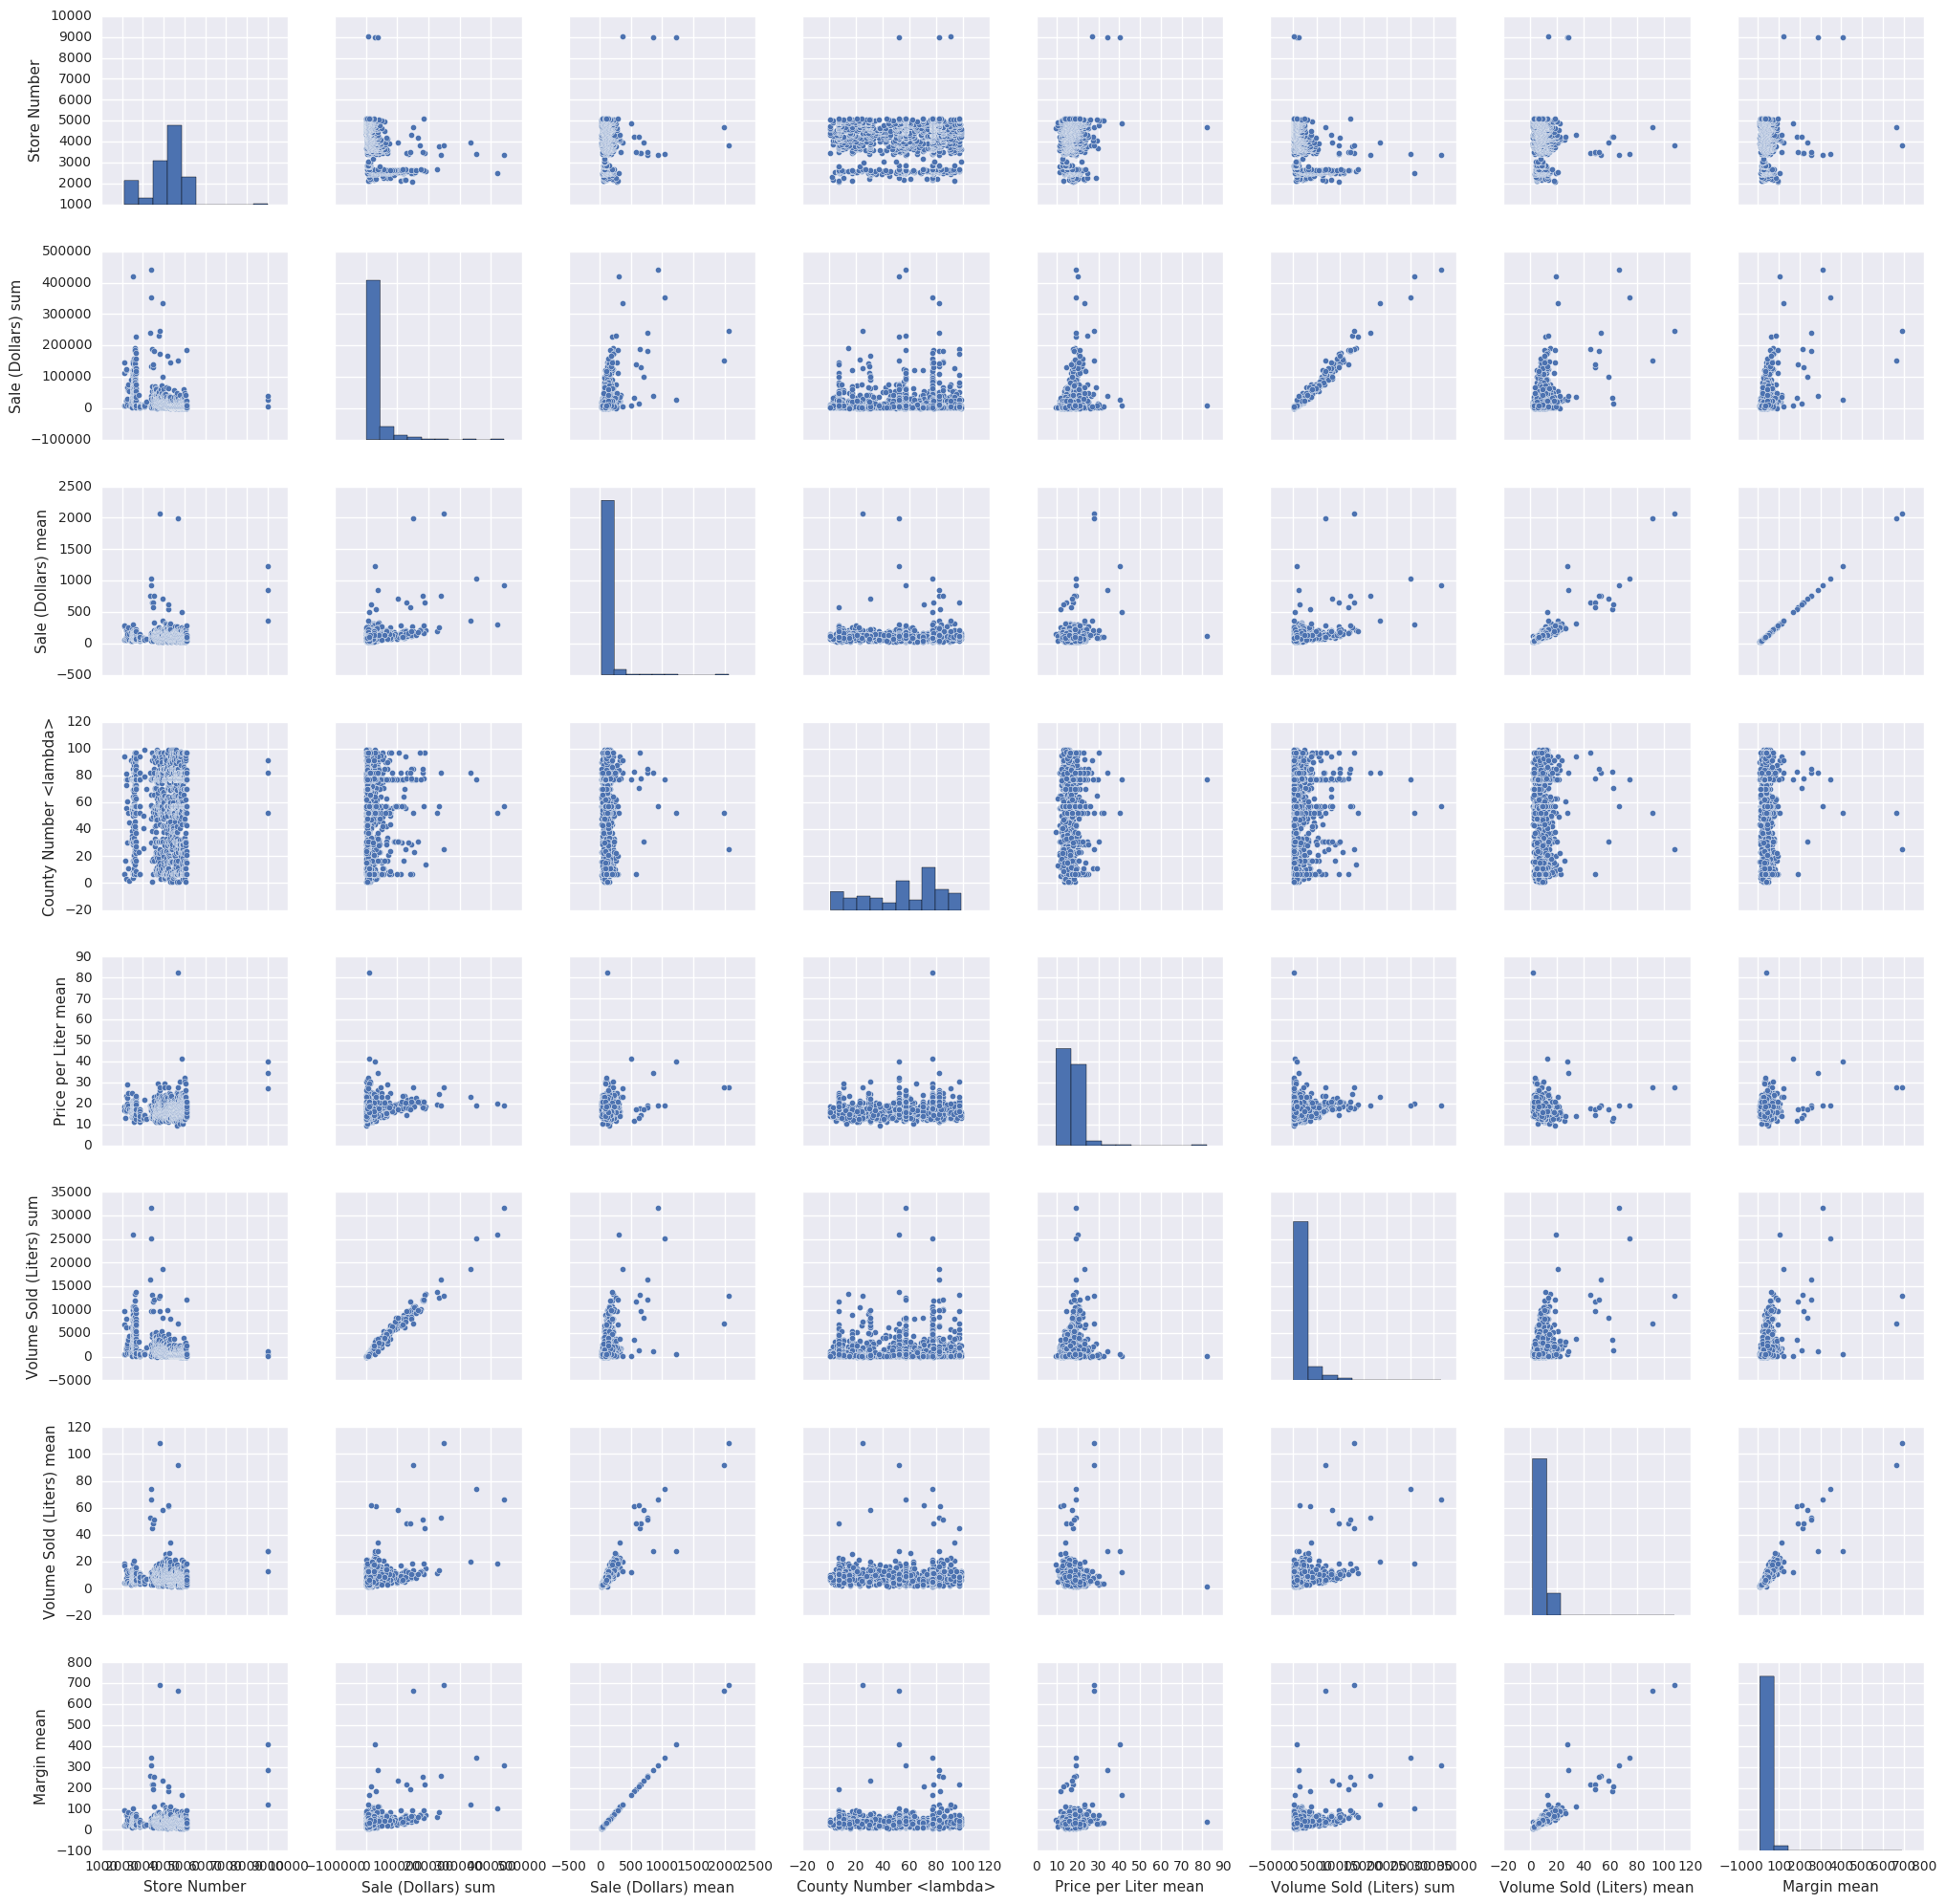

In [21]:
sns.pairplot(sales)

In [23]:
sales[sales["Zip Code <lambda>"] == 50314]

,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean


In [28]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q1
start_date_Q1_15 = pd.Timestamp("20150101")
end_date_Q1_15 = pd.Timestamp("20150401")
mask_Q1_15 = (df['Date'] >= start_date_Q1_15) & (df['Date'] < end_date_Q1_15)
sales_Q1_15 = df[mask_Q1_15]

sales_Q1_15 = sales_Q1_15.groupby(by=["Store Number"], as_index=False)
sales_Q1_15 = sales_Q1_15.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
sales_Q1_15.columns = [' '.join(col).strip() for col in sales_Q1_15.columns.values]
sales_Q1_15.head()


,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean
0,2106,CEDAR FALLS,39287.29,304.552636,7,17.846608,50613,2526.10,19.582171,101.615271
1,2113,GOWRIE,2833.25,67.458333,94,19.365167,50543,177.11,4.216905,22.493333
2,2130,WATERLOO,24272.57,278.995057,7,17.565430,50703,1447.25,16.635057,93.203218
3,2152,ROCKWELL,2003.46,62.608125,17,13.993430,50469,151.74,4.741875,20.893750
4,2178,WAUKON,5856.41,122.008542,3,16.705494,52172,409.81,8.537708,40.860000


In [29]:
# Sales 2016 Q1
start_date_Q1_16 = pd.Timestamp("20160101")
end_date_Q1_16 = pd.Timestamp("20160401")
mask_Q1_16 = (df['Date'] >= start_date_Q1_16) & (df['Date'] < end_date_Q1_16)
sales_Q1_16 = df[mask_Q1_16]

sales_Q1_16 = sales_Q1_16.groupby(by=["Store Number"], as_index=False)
sales_Q1_16 = sales_Q1_16.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
sales_Q1_16.columns = [' '.join(col).strip() for col in sales_Q1_16.columns.values]
sales_Q1_16.head()

,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean
0,2106,CEDAR FALLS,30523.75,240.344488,7,18.064496,50613,2117.75,16.675197,80.233701
1,2113,GOWRIE,2065.90,55.835135,94,17.483024,50543,177.00,4.783784,18.742973
2,2130,WATERLOO,27856.11,238.086410,7,17.452157,50703,1556.90,13.306838,79.387094
3,2152,ROCKWELL,904.66,45.233000,17,12.487833,50469,87.50,4.375000,15.204000
4,2178,WAUKON,5588.50,96.353448,3,15.101929,52172,520.80,8.979310,32.220000


In [31]:
df.head().T

,22111,47659,65214,66346,80570
Date,2015-01-08 00:00:00,2015-01-08 00:00:00,2015-01-08 00:00:00,2015-01-08 00:00:00,2015-01-08 00:00:00
Store Number,2106,2106,2106,2106,2106
City,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS
Zip Code,50613,50613,50613,50613,50613
County Number,7,7,7,7,7
Category,1062200,1022100,1062310,1081200,1062200
Vendor Number,35,410,259,305,434
Item Number,43127,88296,43026,73055,46351
Bottle Volume (ml),1000,750,750,750,1000
State Bottle Cost,9.5,27,5.78,12.5,4.34


In [32]:
sales_zip = df.groupby(by=["Zip Code"], as_index=False)
# Compute sums, means
sales_zip = sales_zip.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
sales_zip.columns = [' '.join(col).strip() for col in sales_zip.columns.values]
sales_zip.head()

,Zip Code,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,Price per Liter mean,County Number <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean
0,50002,ADAIR,5851.20,136.074419,16.262104,1,391.35,9.101163,45.612093
1,50003,ADEL,47716.10,150.050629,15.748419,25,3522.00,11.075472,50.196855
2,50006,ALDEN,11225.08,96.767931,17.455301,42,770.24,6.640000,32.320690
3,50009,ALTOONA,294618.35,140.027733,18.313146,77,20284.04,9.640703,46.794183
4,50010,AMES,927067.00,132.779576,19.143858,85,63103.28,9.037995,44.390215


Proceed with any calculations that you need for your models, such as grouping
sales by zip code, most common vendor number per store, etc. Once you have finished adding columns, be sure to save the dataframe.

In [ ]:
# Compute more things
# ...

In [ ]:
# Save this dataframe

# Let's add the dates computed above to this data.
sales["First Date"] = dates['Date amin']
sales["Last Date"] = dates['Date amax']

sales.to_csv("sales.csv")